<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

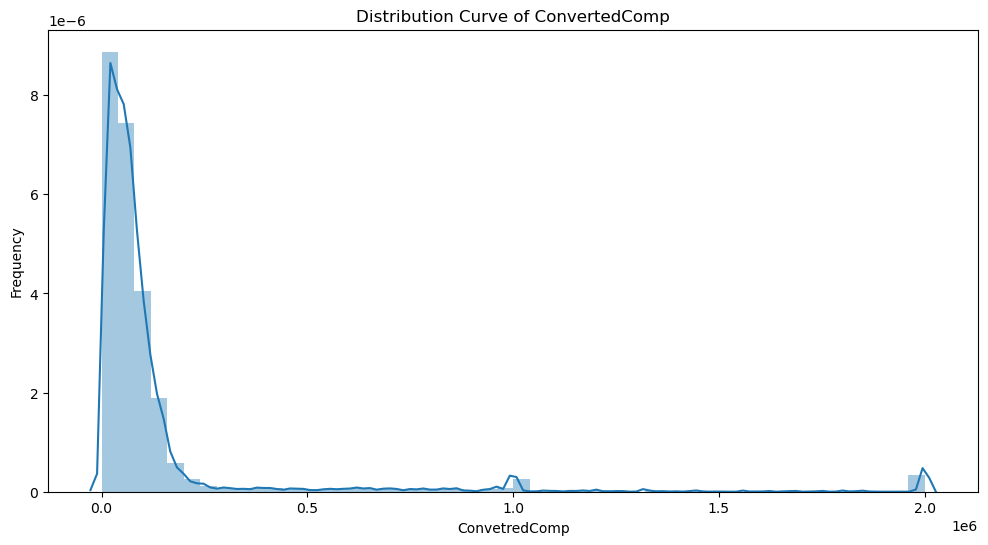

In [15]:
# your code goes here

#drop NaN values in ConertedComp
df.dropna(subset=['ConvertedComp'],inplace=True)
plt.figure(figsize=(12,6))
sns.distplot(df['ConvertedComp'])
plt.title('Distribution Curve of ConvertedComp')
plt.xlabel('ConvetredComp')
plt.ylabel('Frequency')
plt.plot()

Plot the histogram for the column `ConvertedComp`.


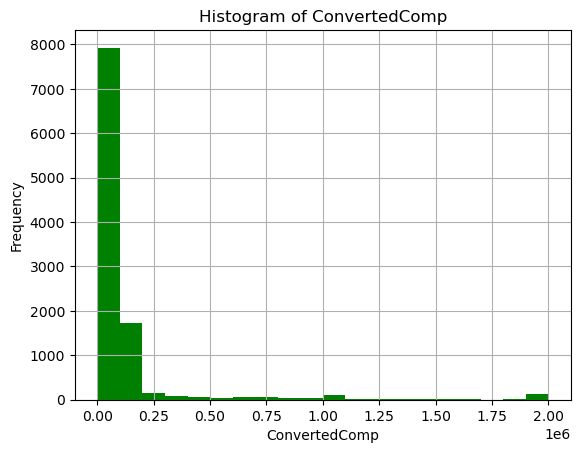

In [21]:
# your code goes here
plt.hist(df['ConvertedComp'], bins=20, color='Green')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.grid()


What is the median of the column `ConvertedComp`?


In [23]:
# your code goes here
median=df['ConvertedComp'].median()
median

57745.0

How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here
df['Gender'].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [33]:
# your code goes here
df.dropna(subset=['Gender', 'ConvertedComp'], inplace=True)
median_ConCom_women=df[df['Gender']=='Woman']['ConvertedComp'].median()
median_ConCom_women

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [37]:
# your code goes here
five_no_summary=df['Age'].describe()
five_no_summary

count    10289.000000
mean        30.829847
std          7.374898
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Histrogram of Age ')

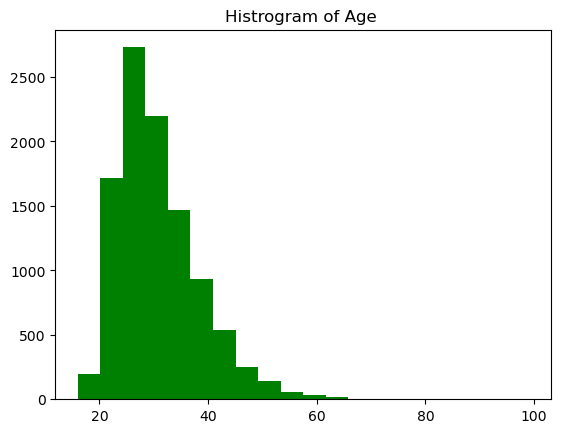

In [69]:
# your code goes here
plt.hist(x=df['Age'], bins=20, color='Green')
plt.title('Histrogram of Age ')



In [70]:
df['Age'].median()

29.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'Box Plot of ConvertedComp')

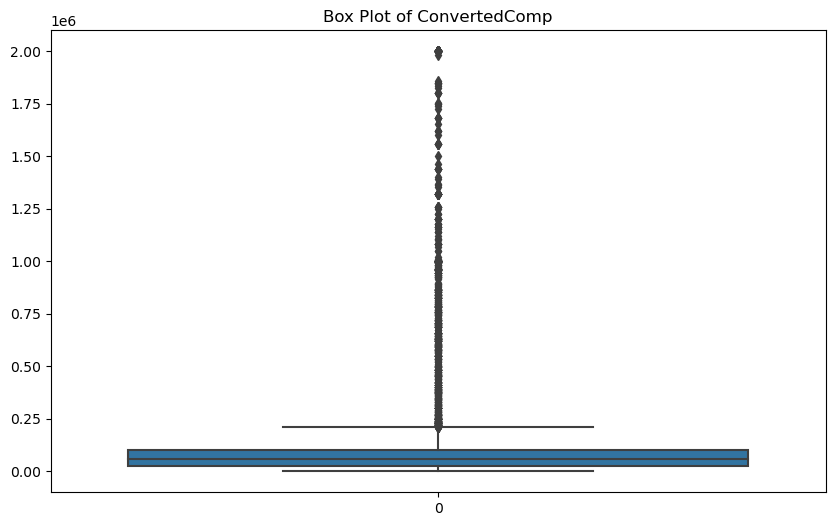

In [44]:
# your code goes here
plt.figure(figsize=(10,6))
sns.boxplot(data=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')


In [13]:
df.dropna(subset=['Age'], inplace=True)
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

below_outlier= Q1-(1.5 * IQR)
outliers=df[df['Age'] < below_outlier]
outliers.shape

(0, 85)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [75]:
# your code goes here
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)

IQR=Q3-Q1
IQR

73132.5

Find out the upper and lower bounds.


In [76]:
# your code goes here
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)

IQR=Q3-Q1
whiskers=1.5 * IQR
upper_bounds=Q3+whiskers
print(upper_bounds)
lower_bounds=Q1-whiskers
print(lower_bounds)

209698.75
-82831.25


Identify how many outliers are there in the `ConvertedComp` column.


In [81]:
# your code goes here
outliers=df[(df['ConvertedComp']<lower_bounds) | (df['ConvertedComp']>upper_bounds)]
num_outliers=outliers.shape
num_outliers

(874, 85)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [85]:
# your code goes here
df_no_outliers=df[(df['ConvertedComp'] >= lower_bounds) & (df['ConvertedComp'] <= upper_bounds)]
df_no_outliers.shape

(9638, 85)

In [88]:
df_no_outliers['ConvertedComp'].median()

52704.0

In [89]:
df_no_outliers['ConvertedComp'].mean()

59874.10136957875

In [90]:
df['ConvertedComp'].median()

57751.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [114]:
corr_matrix = df.corr()


# Extract the correlation of 'Age' with all other numerical columns
corr_with_age = correlation_matrix['Age']
corr_with_age


Respondent       0.000317
CompTotal        0.007073
ConvertedComp    0.105921
WorkWeekHrs      0.031135
CodeRevHrs      -0.016658
Age              1.000000
Name: Age, dtype: float64

In [113]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013357,0.002598,-0.017278,0.006183,0.000317
CompTotal,-0.013357,1.000000,0.001296,0.003351,0.005838,0.007073
ConvertedComp,0.002598,0.001296,1.000000,0.021284,-0.031167,0.105921
WorkWeekHrs,-0.017278,0.003351,0.021284,1.000000,0.032316,0.031135
CodeRevHrs,0.006183,0.005838,-0.031167,0.032316,1.000000,-0.016658
Age,0.000317,0.007073,0.105921,0.031135,-0.016658,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
